In this cell, I start my project by importing the necessary Python libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn import tree, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from pandas import DataFrame
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the dataset:
In this section, I load my dataset from a CSV file named "pd_speech_features.csv" using the pandas library. To get an initial understanding of the data, I display the first few rows.

In [2]:
data = pd.read_csv("pd_speech_features.csv")

In [3]:
data.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


Here i delete 'id' column. I also seperate features from label column.

In [4]:
X  = data.iloc[: , 1:754]

In [5]:
# y = data.iloc[: , 754:755]
y = data['class']

### Data Visualization:

Calculate summary statistics for initial data exploration

In [6]:
summary_stats = data.describe()
print(summary_stats)

               id      gender         PPE         DFA        RPDE   numPulses  \
count  756.000000  756.000000  756.000000  756.000000  756.000000  756.000000   
mean   125.500000    0.515873    0.746284    0.700414    0.489058  323.972222   
std     72.793721    0.500079    0.169294    0.069718    0.137442   99.219059   
min      0.000000    0.000000    0.041551    0.543500    0.154300    2.000000   
25%     62.750000    0.000000    0.762833    0.647053    0.386537  251.000000   
50%    125.500000    1.000000    0.809655    0.700525    0.484355  317.000000   
75%    188.250000    1.000000    0.834315    0.754985    0.586515  384.250000   
max    251.000000    1.000000    0.907660    0.852640    0.871230  907.000000   

       numPeriodsPulses  meanPeriodPulses  stdDevPeriodPulses  locPctJitter  \
count        756.000000        756.000000          756.000000    756.000000   
mean         322.678571          0.006360            0.000383      0.002324   
std           99.402499          

Histogram of the target variable 'y'

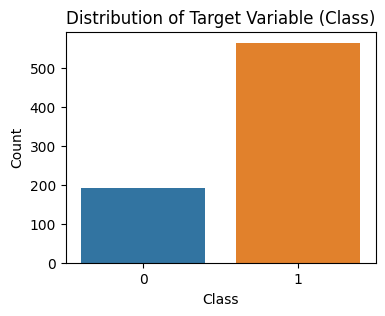

In [7]:
plt.figure(figsize=(4, 3))
sns.countplot(x='class', data=data)
plt.title('Distribution of Target Variable (Class)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Splitting:
Split the dataset into training and testing sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, shuffle = True)

X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

### standard Scaling features:
Standardizing features by removing the mean and scaling to unit variance.

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

As it's mentioned in HW2, I should check the accuracy in the case where all i predict is label '1'.\
I do it as bellow:

In [10]:
import numpy as np 
y_ones = np.ones_like(y_test)
accuracy_score(y_test, y_ones)*100

70.04405286343612

### **Model selection:** 
**Decision tree:** Decision tree model: Tune parameters using cross-validation


In [11]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=2)

DT_result = cross_val_score(clf, X_train, y_train)

print('accuracy:', DT_result.mean()*100)

accuracy: 81.66217430368373



| random state | max depth | Accuracy |
| :-: | :-: | :-: |
| 0 | 2 | 81.6
| 2 | 2 | 81.09
| 20 | 2 | 81.66
| 0 | 10 | 77.1
| 0 | 20 | 76.1
| 0 | 30 | 76.1
| 0 | 5 | 80.3
| 0 | 3 | 81.66
| 0 | 1 | 76.005

Fit and evaluate the Decision Tree model on the training and test sets

In [12]:
clf.fit(X_train, y_train)
y_predict_DT = clf.predict(X_train)
accuracy_score(y_train, y_predict_DT)

0.8620037807183365

Finding the accuracy on test set:

In [13]:
clf.fit(X_train, y_train)
y_predict_DT_test = clf.predict(X_test)
accuracy_score(y_test, y_predict_DT_test)

0.7665198237885462

**Confusion matrix:**\
A confusion matrix M is such that M<sub>ij</sub> is equal to the number of observations known to be in group i and predicted to be in group j.

In [14]:
confusion_matrix(y_test, y_predict_DT_test)

array([[ 31,  37],
       [ 16, 143]])

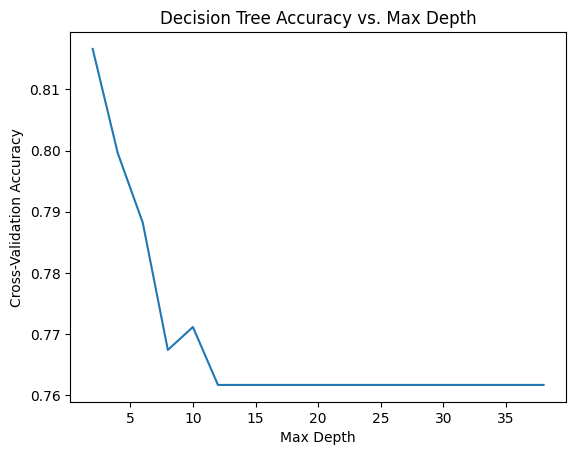

In [15]:
# Plot accuracy vs. max depth for Decision Tree
res = []
ind = []
for i in range(2, 40, 2):
    clf = tree.DecisionTreeClassifier(random_state=0, max_depth=i)
    clf.fit(X_train, y_train)
    result = cross_val_score(clf, X_train, y_train).mean()
    res.append(result)
    ind.append(i)
plt.plot(ind, res)
plt.xlabel("Max Depth")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Decision Tree Accuracy vs. Max Depth")
plt.show()

**K-Nearest Neighbors (KNN) model**: Tune parameters using cross-validation

In [16]:
clf2 = KNeighborsClassifier(n_neighbors=1)
KNN_result = cross_val_score(clf2, X_train, y_train)

print('accuracy:', KNN_result.mean()*100)

accuracy: 90.54806828391735


| n_neighbors | Accuracy |
| :-: |  :-: |
| 5 |  82.9
| 3 |  85.6
| 1  | 90.54
| 7  | 82.99
| 9  | 81.67
| 11  | 82.05
| 16  | 82.04
| 30  | 80.72
| 24  | 81.47
| 28  | 80.9
| 26  | 81.29
| 27  | 79.96

Finding the accuracy on test set:

In [17]:
clf2.fit(X_train, y_train)
y_predict_KNN_test = clf2.predict(X_test)
accuracy_score(y_test, y_predict_KNN_test)*100

88.10572687224669

Confusion matrix:

In [18]:
confusion_matrix(y_test, y_predict_KNN_test)

array([[ 48,  20],
       [  7, 152]])

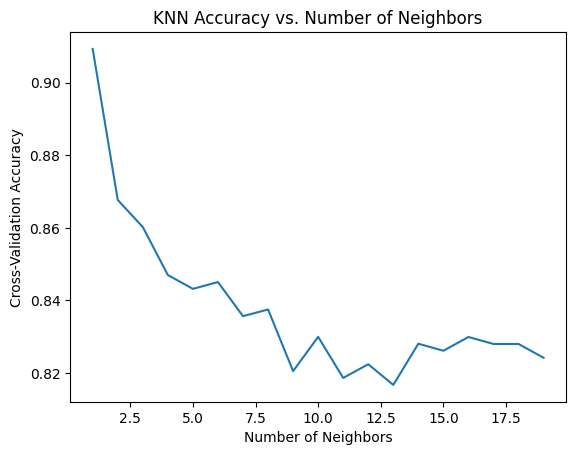

In [50]:
# Plot accuracy vs. number of neighbors for KNN
res = []
ind = []
for i in range(1, 20):
    clf = KNeighborsClassifier(n_neighbors=i)
    KNN_result = cross_val_score(clf, X_train_np, y_train_np).mean()
    res.append(KNN_result)
    ind.append(i)
plt.plot(ind, res)
plt.xlabel("Number of Neighbors")
plt.ylabel("Cross-Validation Accuracy")
plt.title("KNN Accuracy vs. Number of Neighbors")
plt.show()

**Support Vector Machine (SVM) model:** Tune parameters using cross-validation

In [54]:
clf3 = svm.SVC(kernel='rbf', degree=3, C=3)
SVM2_result = cross_val_score(clf3, X_train, y_train)

print('accuracy:', SVM2_result.mean()*100)

accuracy: 86.58580413297395


| c |  degree | Accuracy |
| :- |-: | :-: |
| 3 | 4 |79.77
| 2 | 4 |78.82
| 2 | 5 |78.82
| 2 | 7 |77.69
| 3 | 6 |77.88
| 4 | 6 |78.26
| 3 | 5 |78.82
| 4 | 5 |78.82
| 3 | 3 |86.5
| 3 | 2 |86.01

Finding accuracy on test set:

In [21]:
clf3.fit(X_train, y_train)
y_predict_SVM_test = clf3.predict(X_test)
accuracy_score(y_test, y_predict_SVM_test)*100

82.37885462555066

Making confusion matrix:

In [22]:
confusion_matrix(y_test, y_predict_SVM_test)

array([[ 33,  35],
       [  5, 154]])

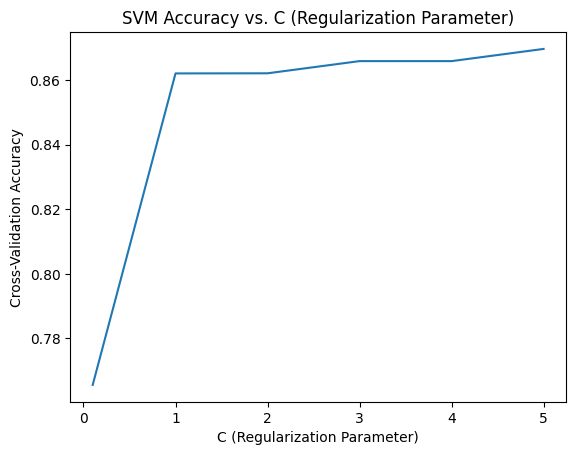

In [58]:
# SVM: Plotting accuracy vs. C (SVM regularization parameter)
C_values = [0.1, 1, 2, 3, 4, 5]
mean_accuracy_values = []

for C in C_values:
    clf = svm.SVC(kernel='rbf', degree=3, C=C)
    SVM_result = cross_val_score(clf, X_train, y_train)
    mean_accuracy_values.append(SVM_result.mean())

plt.plot(C_values, mean_accuracy_values)
plt.xlabel("C (Regularization Parameter)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("SVM Accuracy vs. C (Regularization Parameter)")
plt.show()


**Random Forest model**: Tune parameters using cross-validation

In [24]:
clf4 = RandomForestClassifier(max_depth=30, random_state=0, n_estimators = 50)

result = cross_val_score(clf4, X_train, y_train)

print('accuracy:', result.mean()*100)

accuracy: 87.14645103324348


| max depth | random state | n_estimator |Accuracy |
| :-: |:-: | :-: | :-: |
| 5 | 0 | 50 |85.06
| 3 | 0 | 50 |82.9
| 6 | 0 | 50 |84.8
| 8 | 0 | 50 |86.01
| 10 | 0 | 50 |86.19
| 15 | 0 | 50 |86.95
| 20 | 0 | 50 |87.14
| 30 | 0 | 50 |82.61
| 30 | 0 | 30 |85.44
| 30 | 0 | 60 |86.57

In [25]:
clf4.fit(X_train, y_train)
y_predict_RF_test = clf4.predict(X_test)
accuracy_score(y_test, y_predict_RF_test)*100

85.46255506607929

Accuracy on test set:

In [26]:
confusion_matrix(y_test, y_predict_RF_test)

array([[ 39,  29],
       [  4, 155]])

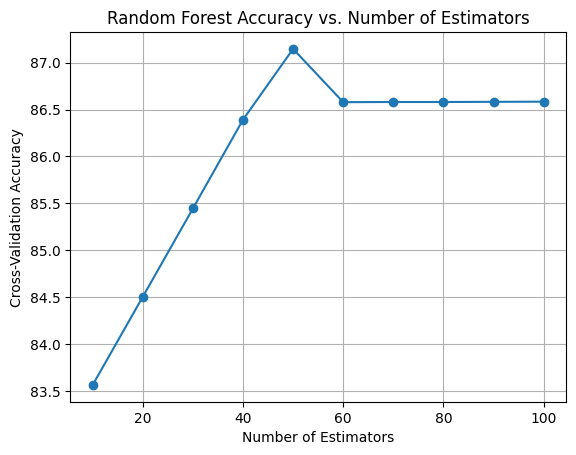

In [27]:
# Random Forest: Plotting accuracy vs. number of estimators
n_estimators_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
accuracy_values = []

for n_estimators in n_estimators_values:
    clf = RandomForestClassifier(max_depth=30, random_state=0, n_estimators=n_estimators)
    RF_result = cross_val_score(clf, X_train, y_train)
    accuracy_values.append(RF_result.mean() * 100)

plt.plot(n_estimators_values, accuracy_values, marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Random Forest Accuracy vs. Number of Estimators")
plt.grid(True)
plt.show()

### **PCA** 
Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.
As there are a lot of features in this dataset, it is convenient to use PCA.

In [28]:
pca = PCA(n_components=100)
pca.fit(X_train)
X_train = pca.transform(X_train)

Making a dataframe from the proccessed data.(train data)

In [29]:
X_train = pd.DataFrame(X_train)

Doing PCA on test data.

In [30]:
pca.fit(X_test)
X_test = pca.transform(X_test)

**Decision tree:**

In [31]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
clf.fit(X_train, y_train)
result = cross_val_score(clf, X_train, y_train)
print('accuracy:', result.mean()*100)

accuracy: 80.71698113207546



| random state | max depth | Accuracy |
| :-: | :-: | :-: |
| 0 | 2 | 80.90
| 2 | 2 | 80.90
| 20 | 2 | 80.90
| 0 | 1 | 78.26
| 0 | 15 | 77.49
| 0 | 10 | 78.25

Accuracy on test set:

In [32]:
clf.fit(X_train, y_train)
y_predict_DT_test_PCA = clf.predict(X_test)
accuracy_score(y_test, y_predict_DT_test_PCA)*100

70.04405286343612

Confusion matrix:

In [33]:
confusion_matrix(y_test, y_predict_DT_test_PCA)

array([[  2,  66],
       [  2, 157]])

**KNN:**

In [34]:
clf = KNeighborsClassifier(n_neighbors=1)


X_train_np = X_train.to_numpy()
# X_test_np = X_test.to_numpy()

# Convert y_train to a NumPy array
y_train_np = y_train.to_numpy()

KNN_result = cross_val_score(clf, X_train_np, y_train_np)

print('accuracy:', KNN_result.mean()*100)

accuracy: 90.92902066486973


| n_neighbors | Accuracy |
| :-: |  :-: |
| 5 |  83.94
| 3 |  86.3
| 1  | 90.73
| 7  | 83.75

Accuracy on test set:

In [35]:
clf.fit(X_train, y_train)
y_predict_KNN_test_PCA = clf.predict(X_test)
accuracy_score(y_test, y_predict_KNN_test_PCA)*100

66.96035242290749

Confusion matrix:

In [36]:
confusion_matrix(y_test, y_predict_KNN_test_PCA)

array([[ 15,  53],
       [ 22, 137]])

**SVM:**

In [37]:
clf = svm.SVC(kernel='rbf', degree=2, C=10)
SVM2_result = cross_val_score(clf, X_train, y_train)

print('accuracy:', SVM2_result.mean()*100)

accuracy: 86.39532794249776


| degree |  c | Accuracy |
| :- |-: | :-: |
| 1 | 2 |86.20
| 1 | 3 |86.20
| 1 | 4 |86.20
| 2 | 3 |86.20
| 2 | 10 |86.77

Accuracy on test set:

In [38]:
clf.fit(X_train, y_train)
y_predict_SVM_test_PCA = clf.predict(X_test)
accuracy_score(y_test, y_predict_SVM_test_PCA)*100

67.84140969162996

Confusion matrix:

In [39]:
confusion_matrix(y_test, y_predict_SVM_test_PCA)

array([[  7,  61],
       [ 12, 147]])

**Random Forrest:**

In [40]:
clf = RandomForestClassifier(max_depth=40, random_state=0, n_estimators = 50)

result = cross_val_score(clf, X_train, y_train)

print('accuracy:', result.mean()*100)

accuracy: 82.04312668463612


| max depth | random state | n_estimator |Accuracy |
| :-: |:-: | :-: | :-: |
| 5 | 0 | 50 |78.45
| 40 | 0 | 50 |82.61
| 30 | 0 | 30 |82.23
| 30 | 0 | 50 |81.85
| 30 | 0 | 70 |81.09
| 50 | 0 | 50 |81.85

Accuracy on test set:

In [41]:
clf.fit(X_train, y_train)
y_predict_RF_test_PCA = clf.predict(X_test)
accuracy_score(y_test, y_predict_RF_test_PCA)*100

69.16299559471366

Confusion matrix:

In [42]:
confusion_matrix(y_test, y_predict_RF_test_PCA)

array([[  0,  68],
       [  2, 157]])

Another way to check the accuracy:

In [43]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_predict_RF_test_PCA))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.70      0.99      0.82       159

    accuracy                           0.69       227
   macro avg       0.35      0.49      0.41       227
weighted avg       0.49      0.69      0.57       227



Before PCA:


| model |cross validation | test | train |
| :-: |:-: | :-: | :-: |
| Desicion tree | 81.6| 76.6 | 86.2
| KNN | 90 | 88 |100
| SVM | 86.01 | 82.3 |98
| Random forrest | 87.1 | 85.4 | 100


After PCA:


| model |cross validation | test | train |
| :-: |:-: | :-: | :-: |
| Desicion tree | 80.90| 81.3 | 99.8
| KNN | 89.9 | 65 |100
| SVM | 86.77 | 71.3 |99.8
| Random forrest | 81.8 | 69.1 | 100


As it was obvious (Due to the loss of data), the accuracy decreased after doing PCA.\
Overall PCA will help us to reduce the time needed for trainin, although it ,mostly, will reduce the accuracy.\
It can be seen that random forrest and KNN are overfitting (both after and before PCA).

**PLOTS:**

In [44]:
res = []
ind = []

for i in range(1,20):
  clf = KNeighborsClassifier(n_neighbors=i)
  KNN_result = cross_val_score(clf, X_train_np, y_train_np).mean()
  res.append(KNN_result)
  ind.append(i)

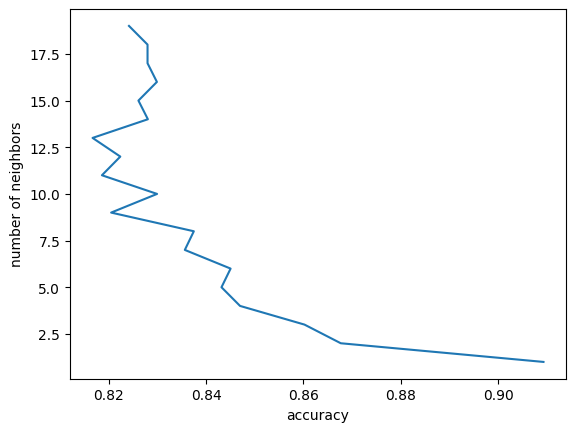

In [45]:
plt.plot(res,ind)
plt.xlabel("accuracy")
plt.ylabel("number of neighbors")
plt.show()

As the number of neighbors increases, accuracy decreases.

In [46]:
res =[]
ind =[]
for i in range(2, 40, 2):
  clf = tree.DecisionTreeClassifier(random_state=0, max_depth=i)
  clf.fit(X_train, y_train)
  result = cross_val_score(clf, X_train, y_train).mean()
  res.append(result)
  ind.append(i)

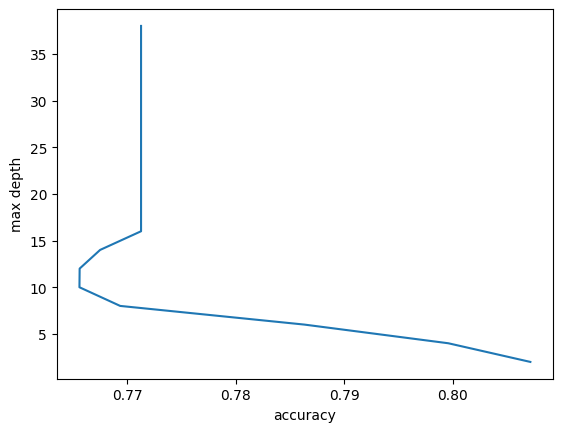

In [47]:
plt.plot(res,ind)
plt.xlabel("accuracy")
plt.ylabel("max depth")
plt.show()

As the max depth increases, accuracy decreases.

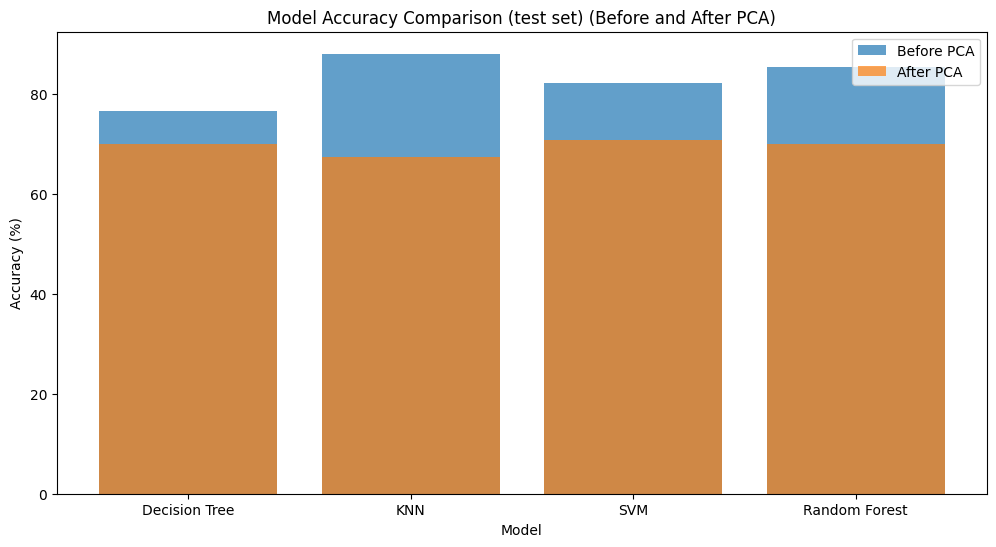

In [48]:
# Plotting accuracy comparison before and after PCA
plt.figure(figsize=(12, 6))
models = ['Decision Tree', 'KNN', 'SVM', 'Random Forest']
accuracy_before_pca = [76.6, 88.1, 82.3, 85.4]  # Replace with your accuracy scores
accuracy_after_pca = [70.0, 67.4, 70.9, 70.04]    # Replace with your accuracy scores
plt.bar(models, accuracy_before_pca, alpha=0.7, label='Before PCA')
plt.bar(models, accuracy_after_pca, alpha=0.7, label='After PCA')
plt.title('Model Accuracy Comparison (test set) (Before and After PCA)')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.legend(loc='upper right')
plt.show()
